## **Task 1: Exploring and Visualizing a Simple Dataset**

📊 IRIS DATASET EXPLORATION AND VISUALIZATION

🔍 SECTION 1: LOADING THE DATASET
----------------------------------------
✅ Dataset loaded successfully!
📁 Data source: sklearn.datasets (built-in)

🔍 SECTION 2: BASIC DATA INSPECTION
----------------------------------------
📏 Dataset Shape: (150, 5)
   → 150 rows (samples)
   → 5 columns (features)

📋 Column Names:
   1. sepal length (cm)
   2. sepal width (cm)
   3. petal length (cm)
   4. petal width (cm)
   5. species

📄 First 5 rows:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  


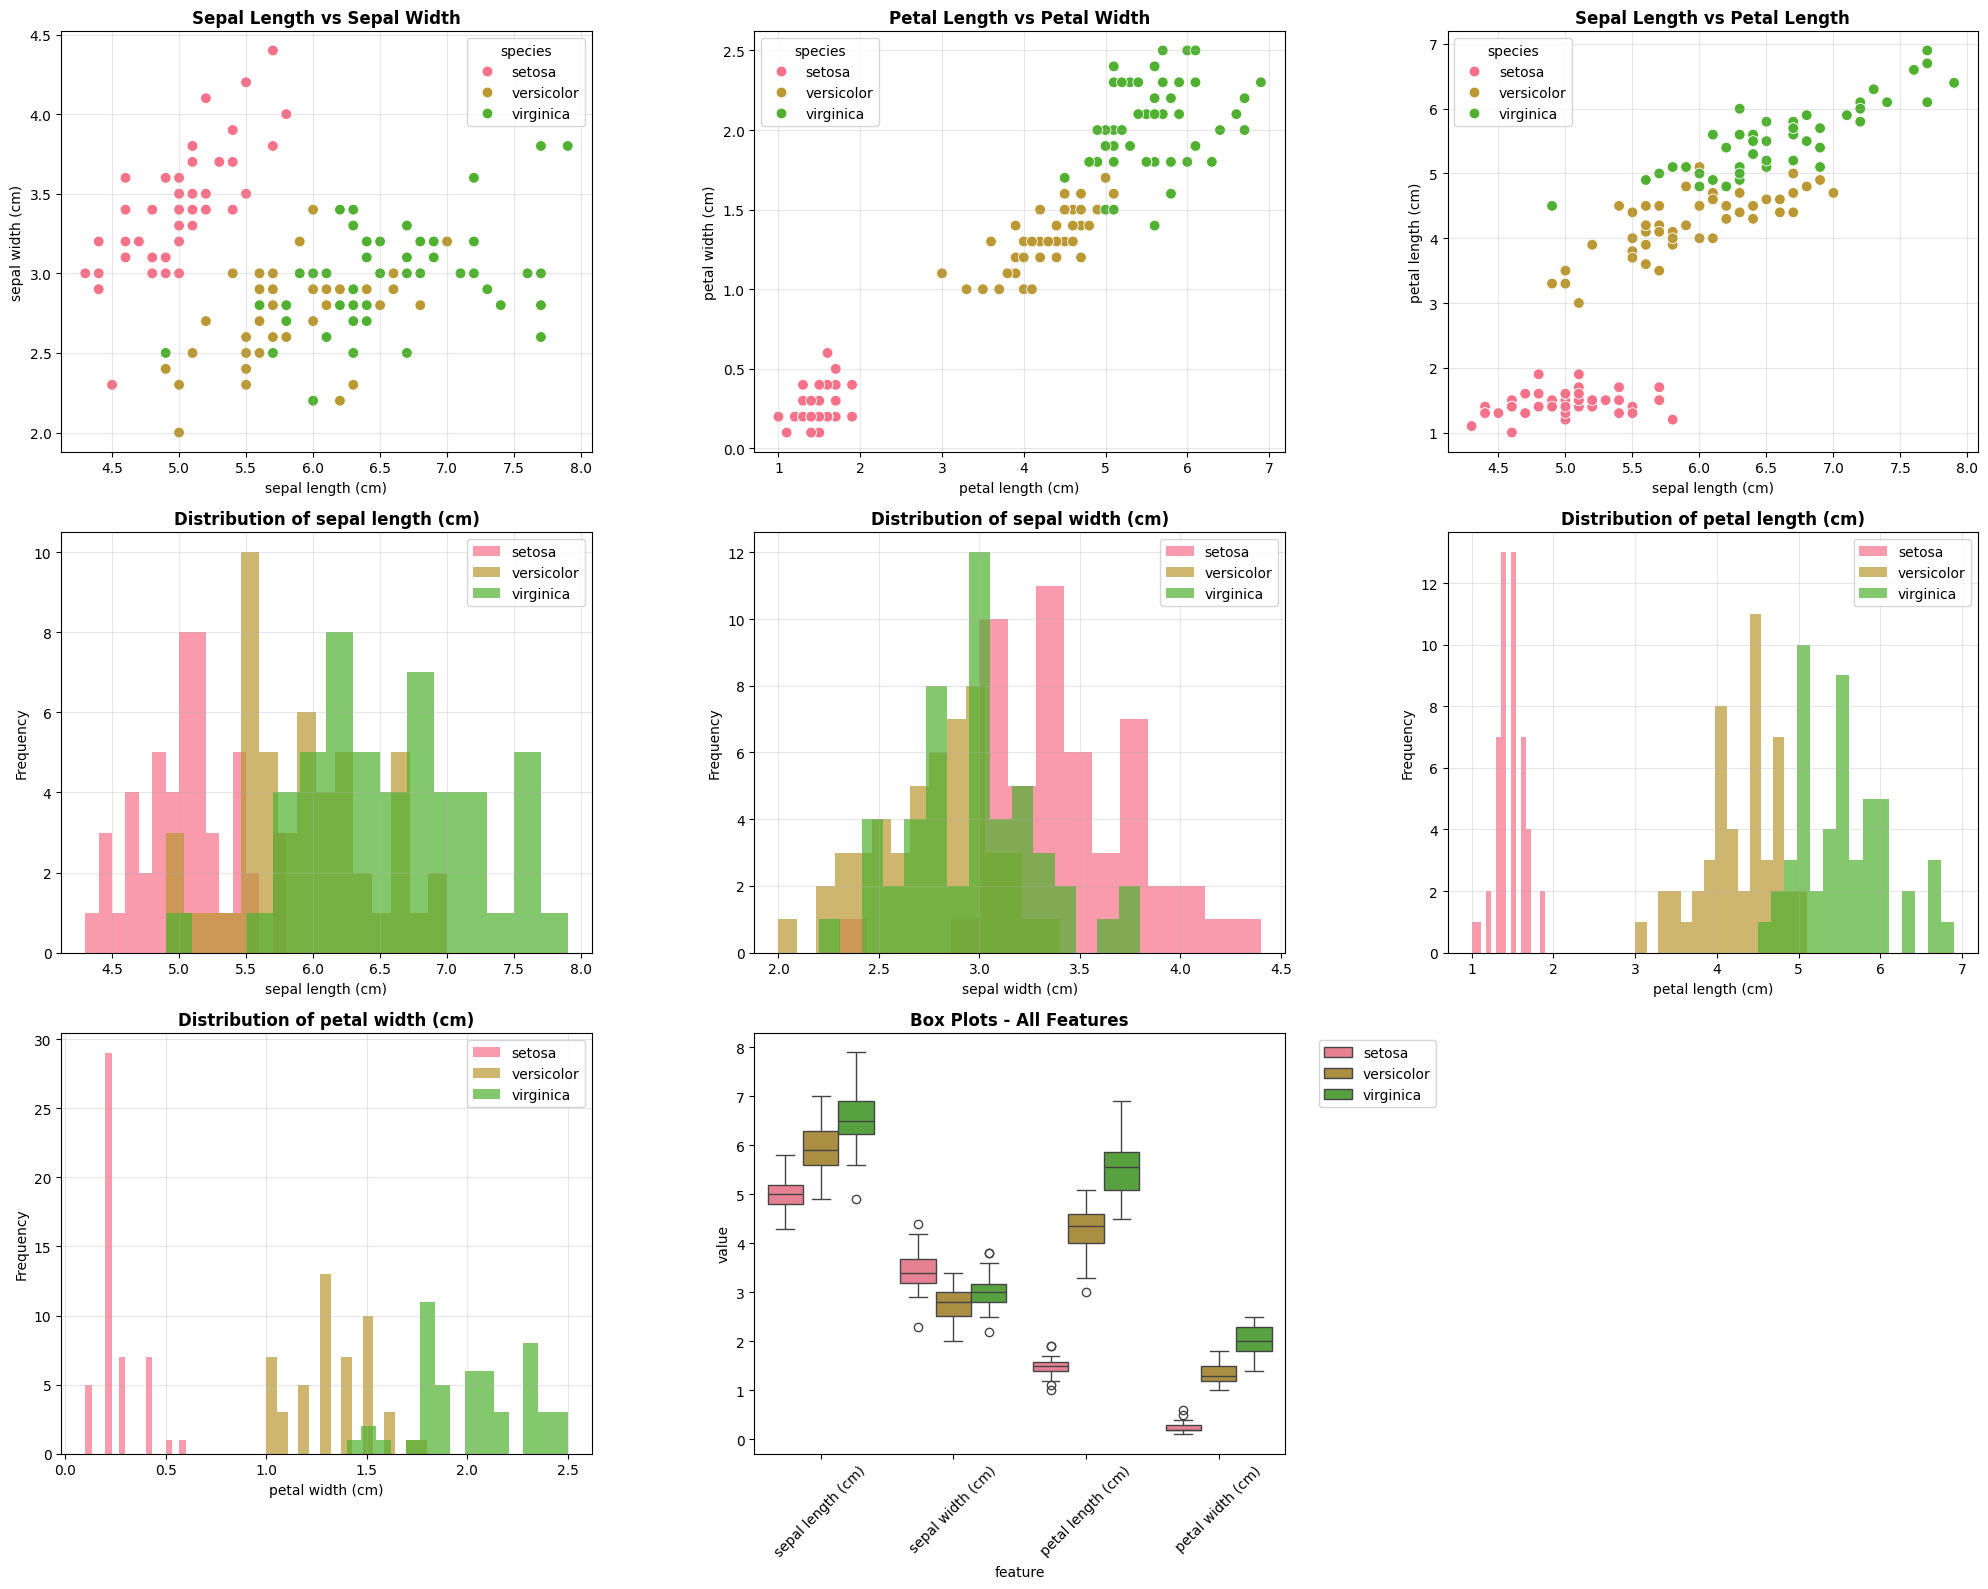


🎨 ADVANCED VISUALIZATIONS
----------------------------------------
🔄 Creating comprehensive pair plot...


<Figure size 1200x1000 with 0 Axes>

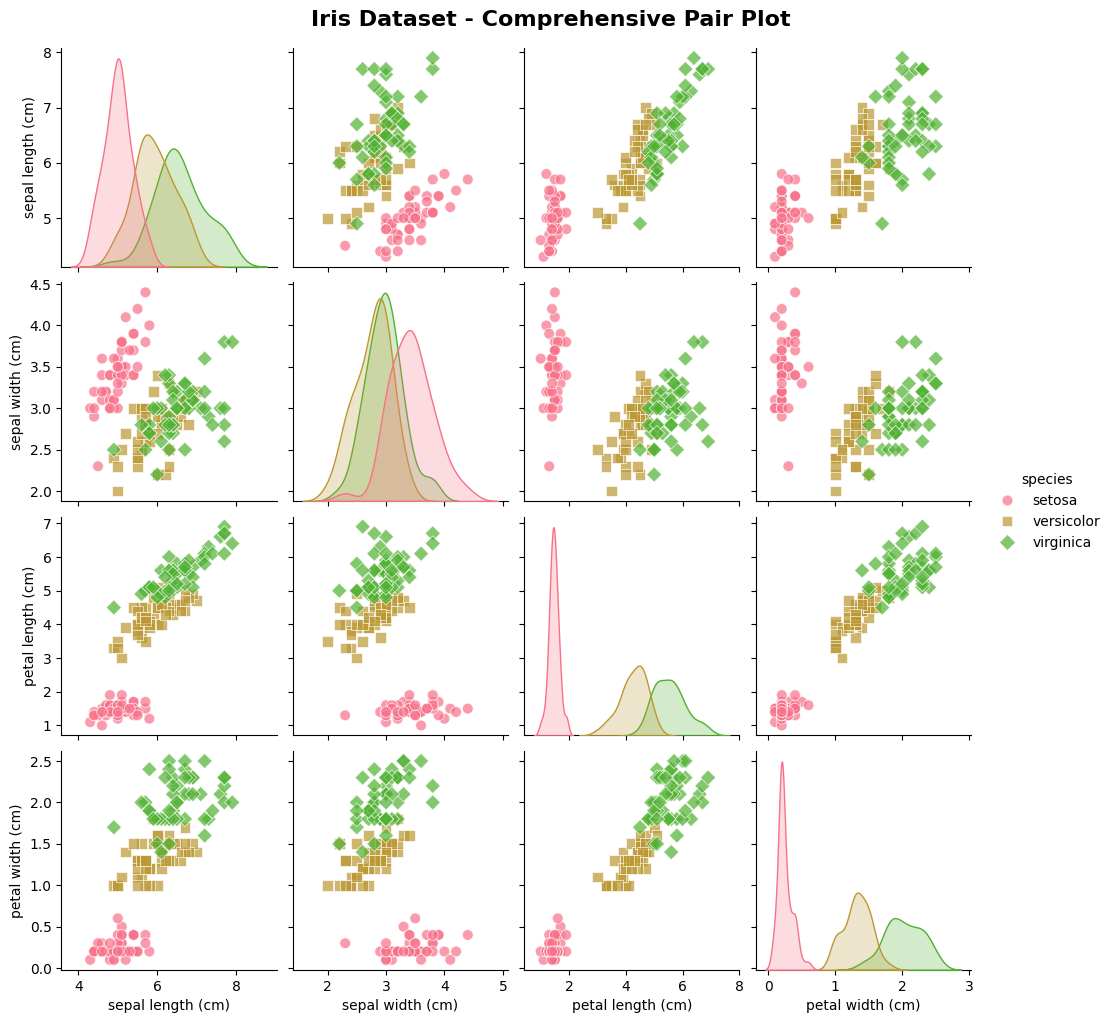

🔥 Creating correlation heatmap...


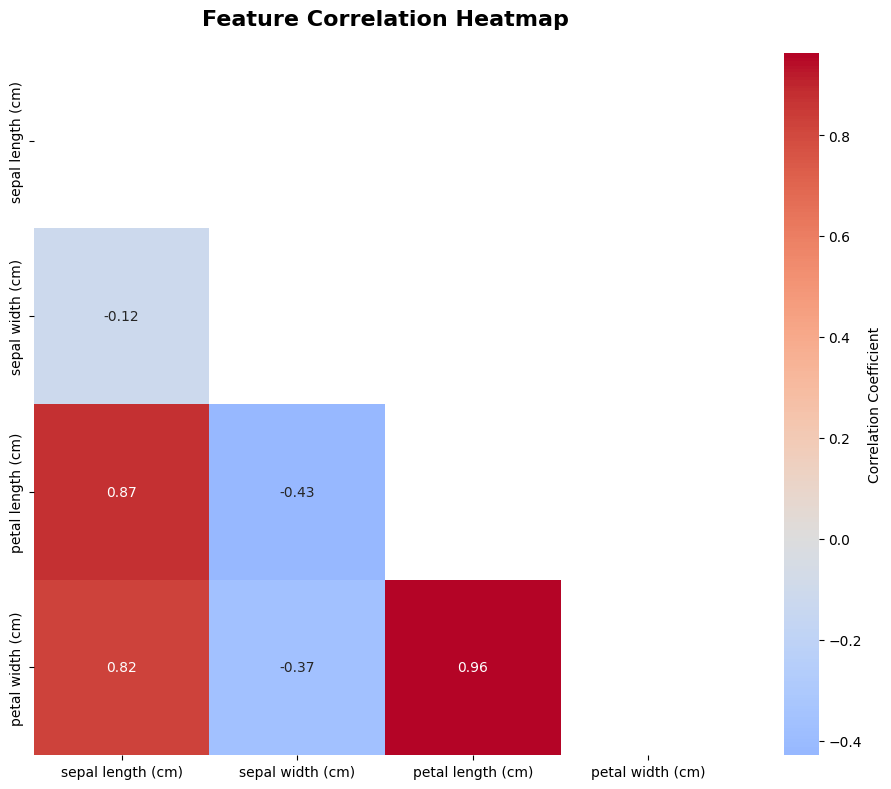

📊 Creating detailed box plots...


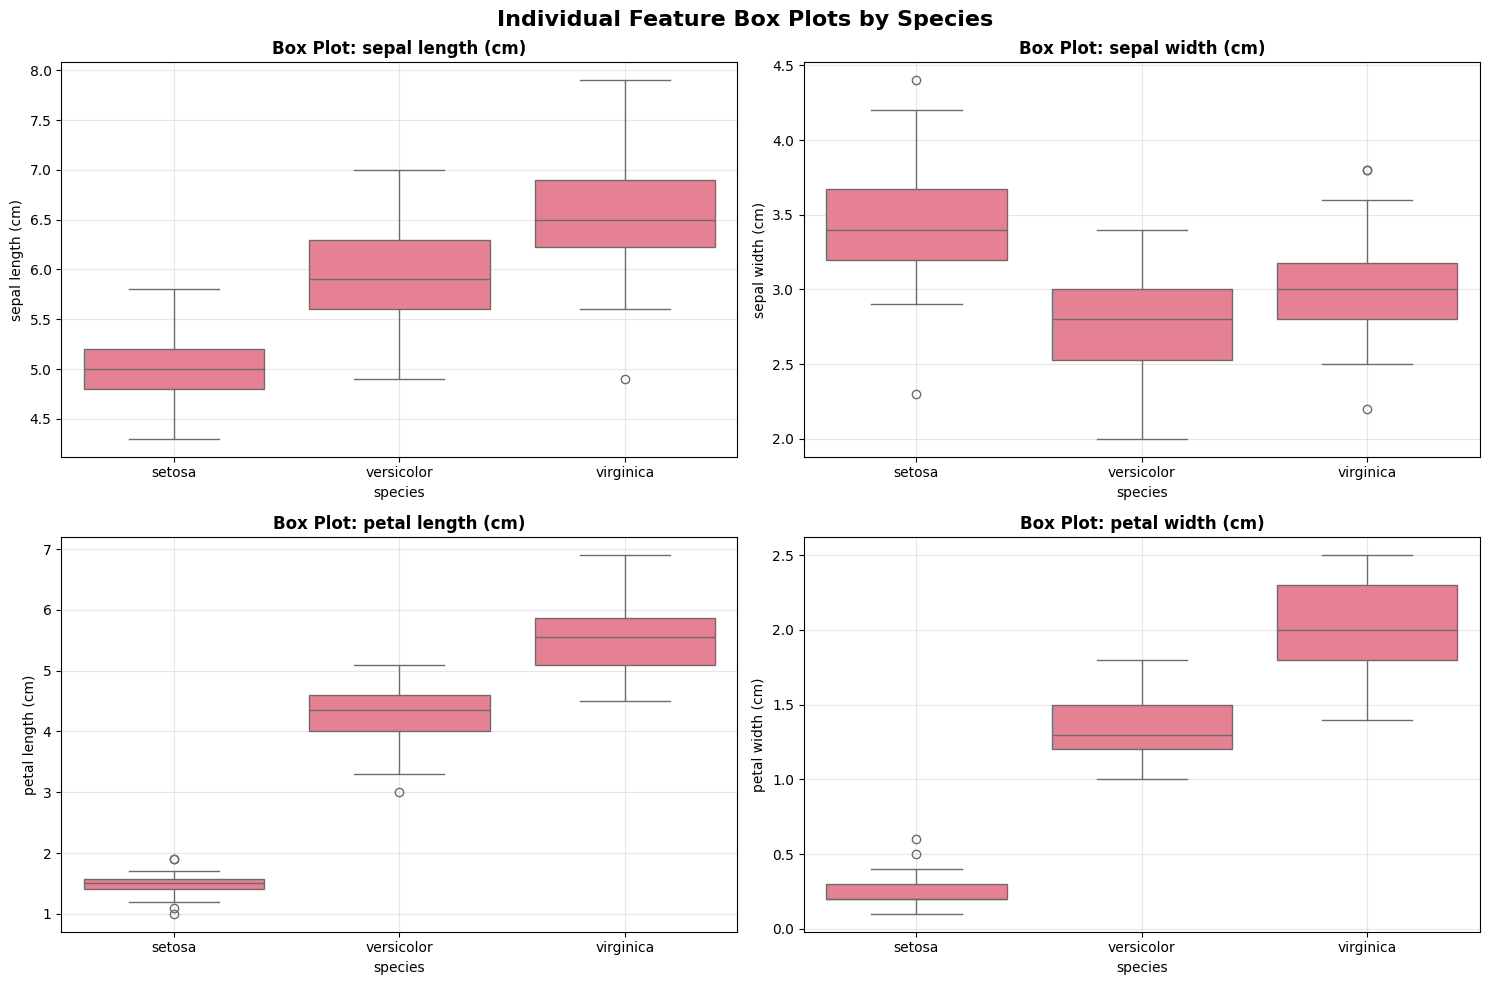

🎻 Creating violin plots...


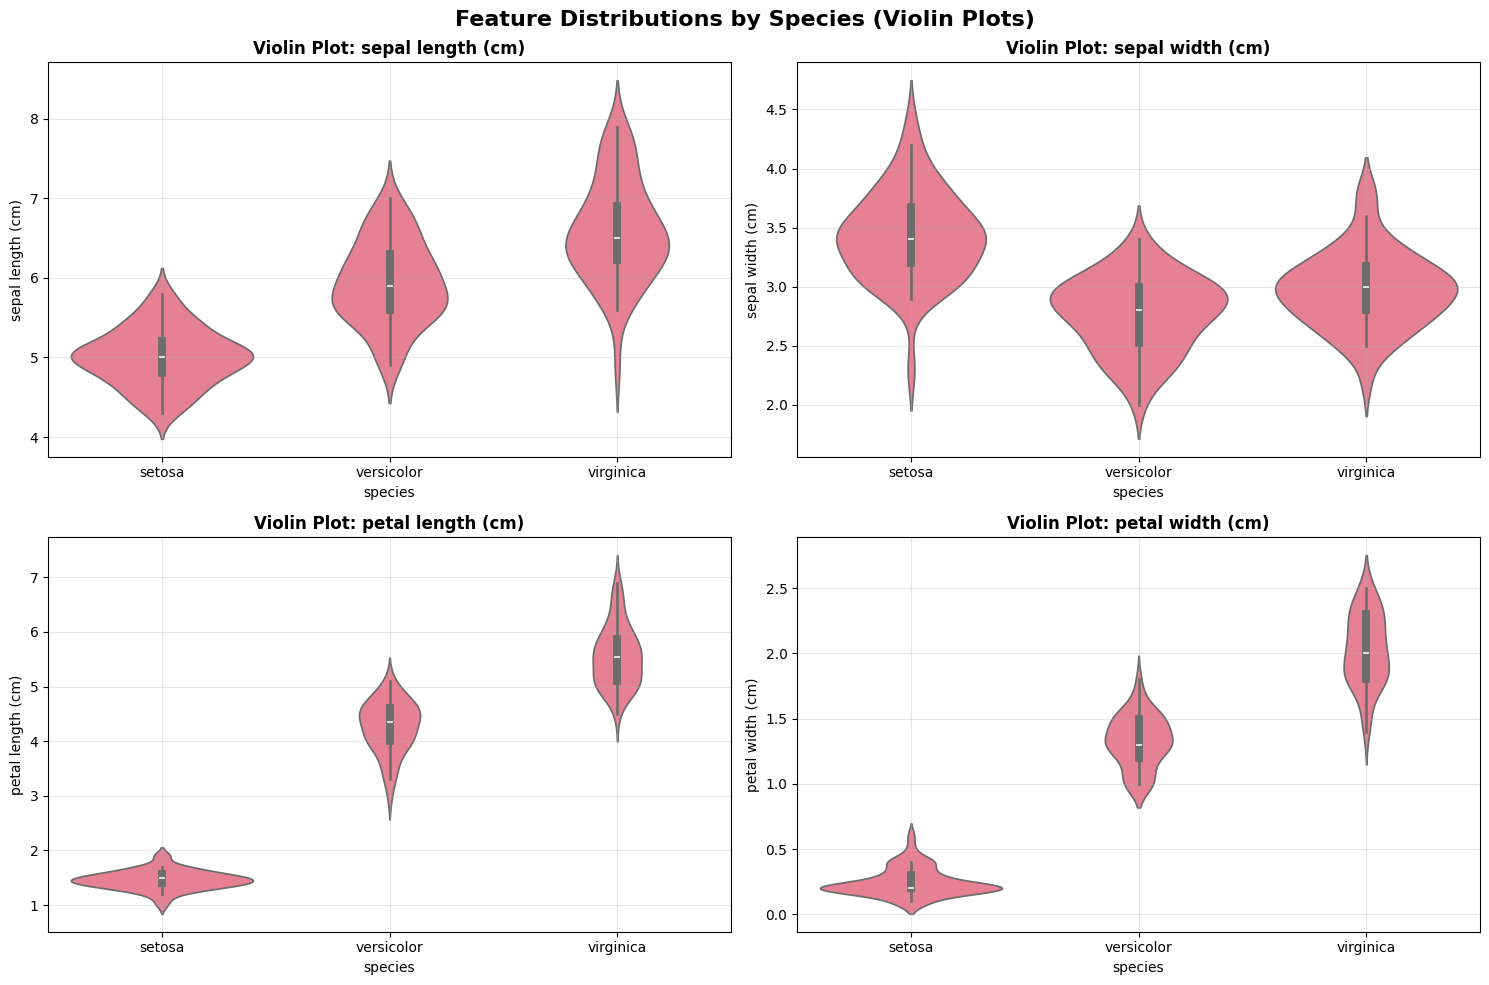


💡 SECTION 4: KEY INSIGHTS AND OBSERVATIONS
--------------------------------------------------
🔍 DATASET OVERVIEW:
   • Total samples: 150
   • Features: 4
   • Classes: 3
   • Balanced dataset: True

📊 FEATURE INSIGHTS:
   • sepal length (cm):
     - Range: 4.30 to 7.90
     - Mean: 5.84 (±0.83)
   • sepal width (cm):
     - Range: 2.00 to 4.40
     - Mean: 3.06 (±0.44)
   • petal length (cm):
     - Range: 1.00 to 6.90
     - Mean: 3.76 (±1.77)
   • petal width (cm):
     - Range: 0.10 to 2.50
     - Mean: 1.20 (±0.76)

🌸 SPECIES CHARACTERISTICS:
            sepal length (cm)  sepal width (cm)  petal length (cm)  \
species                                                              
setosa                   5.01              3.43               1.46   
versicolor               5.94              2.77               4.26   
virginica                6.59              2.97               5.55   

            petal width (cm)  
species                       
setosa                  0.25  
v

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

print("📊 IRIS DATASET EXPLORATION AND VISUALIZATION")
print("=" * 50)

# SECTION 1: LOADING THE DATASET

print("\n🔍 SECTION 1: LOADING THE DATASET")
print("-" * 40)

# Method 1: Load from sklearn (recommended for Colab)
iris_sklearn = load_iris()
df = pd.DataFrame(iris_sklearn.data, columns=iris_sklearn.feature_names)
df['species'] = iris_sklearn.target
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Method 2: Load from seaborn (alternative)
# df = sns.load_dataset('iris')

print("✅ Dataset loaded successfully!")
print(f"📁 Data source: sklearn.datasets (built-in)")

# SECTION 2: BASIC DATA INSPECTION

print("\n🔍 SECTION 2: BASIC DATA INSPECTION")
print("-" * 40)

# Dataset shape
print(f"📏 Dataset Shape: {df.shape}")
print(f"   → {df.shape[0]} rows (samples)")
print(f"   → {df.shape[1]} columns (features)")

# Column names
print(f"\n📋 Column Names:")
for i, col in enumerate(df.columns, 1):
    print(f"   {i}. {col}")

# First few rows
print(f"\n📄 First 5 rows:")
print(df.head())

# Dataset info
print(f"\n📊 Dataset Info:")
print(df.info())

# Summary statistics
print(f"\n📈 Summary Statistics:")
print(df.describe())

# Check for missing values
print(f"\n❓ Missing Values:")
missing_values = df.isnull().sum()
print(missing_values)
if missing_values.sum() == 0:
    print("✅ No missing values found!")

# Species distribution
print(f"\n🌸 Species Distribution:")
species_counts = df['species'].value_counts()
print(species_counts)

# SECTION 3: DATA VISUALIZATION

print("\n📊 SECTION 3: DATA VISUALIZATION")
print("-" * 40)

# Set up the plotting area
fig = plt.figure(figsize=(20, 16))

# 3.1: SCATTER PLOTS - Relationships between features

print("\n📈 Creating scatter plots...")

# Scatter plot matrix (pairplot)
plt.subplot(3, 3, 1)
sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)', hue='species', s=60)
plt.title('Sepal Length vs Sepal Width', fontweight='bold')
plt.grid(True, alpha=0.3)

plt.subplot(3, 3, 2)
sns.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)', hue='species', s=60)
plt.title('Petal Length vs Petal Width', fontweight='bold')
plt.grid(True, alpha=0.3)

plt.subplot(3, 3, 3)
sns.scatterplot(data=df, x='sepal length (cm)', y='petal length (cm)', hue='species', s=60)
plt.title('Sepal Length vs Petal Length', fontweight='bold')
plt.grid(True, alpha=0.3)

# 3.2: HISTOGRAMS - Value distributions

print("📊 Creating histograms...")

# Histograms for each feature
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

for i, feature in enumerate(features, 4):
    plt.subplot(3, 3, i)

    # Create histogram for each species
    for species in df['species'].unique():
        species_data = df[df['species'] == species][feature]
        plt.hist(species_data, alpha=0.7, label=species, bins=15)

    plt.title(f'Distribution of {feature}', fontweight='bold')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True, alpha=0.3)

# 3.3: BOX PLOTS - Identifying outliers

print("📦 Creating box plots...")

# Box plots for outlier detection
plt.subplot(3, 3, 8)
df_melted = df.melt(id_vars='species', var_name='feature', value_name='value')
sns.boxplot(data=df_melted, x='feature', y='value', hue='species')
plt.title('Box Plots - All Features', fontweight='bold')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# ADVANCED VISUALIZATIONS

print("\n🎨 ADVANCED VISUALIZATIONS")
print("-" * 40)

# Create a comprehensive pairplot
print("🔄 Creating comprehensive pair plot...")
plt.figure(figsize=(12, 10))
pairplot = sns.pairplot(df, hue='species', markers=["o", "s", "D"],
                       plot_kws={'alpha': 0.7, 's': 60})
pairplot.fig.suptitle('Iris Dataset - Comprehensive Pair Plot', y=1.02, fontsize=16, fontweight='bold')
plt.show()

# Correlation heatmap
print("🔥 Creating correlation heatmap...")
plt.figure(figsize=(10, 8))
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm',
           center=0, square=True, fmt='.2f', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Individual box plots for better outlier analysis
print("📊 Creating detailed box plots...")
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for i, feature in enumerate(features):
    sns.boxplot(data=df, x='species', y=feature, ax=axes[i])
    axes[i].set_title(f'Box Plot: {feature}', fontweight='bold')
    axes[i].grid(True, alpha=0.3)

plt.suptitle('Individual Feature Box Plots by Species', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Violin plots for distribution shape
print("🎻 Creating violin plots...")
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for i, feature in enumerate(features):
    sns.violinplot(data=df, x='species', y=feature, ax=axes[i])
    axes[i].set_title(f'Violin Plot: {feature}', fontweight='bold')
    axes[i].grid(True, alpha=0.3)

plt.suptitle('Feature Distributions by Species (Violin Plots)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# SECTION 4: KEY INSIGHTS AND OBSERVATIONS

print("\n💡 SECTION 4: KEY INSIGHTS AND OBSERVATIONS")
print("-" * 50)

print("🔍 DATASET OVERVIEW:")
print(f"   • Total samples: {len(df)}")
print(f"   • Features: {len(df.columns)-1}")
print(f"   • Classes: {df['species'].nunique()}")
print(f"   • Balanced dataset: {df['species'].value_counts().std() < 1}")

print("\n📊 FEATURE INSIGHTS:")
for feature in features:
    feature_stats = df[feature].describe()
    print(f"   • {feature}:")
    print(f"     - Range: {feature_stats['min']:.2f} to {feature_stats['max']:.2f}")
    print(f"     - Mean: {feature_stats['mean']:.2f} (±{feature_stats['std']:.2f})")

print("\n🌸 SPECIES CHARACTERISTICS:")
species_summary = df.groupby('species')[features].mean()
print(species_summary.round(2))

print("\n🔗 CORRELATIONS:")
high_corr_pairs = []
for i in range(len(features)):
    for j in range(i+1, len(features)):
        corr = correlation_matrix.iloc[i, j]
        if abs(corr) > 0.8:
            high_corr_pairs.append((features[i], features[j], corr))

if high_corr_pairs:
    print("   Strong correlations found:")
    for feat1, feat2, corr in high_corr_pairs:
        print(f"   • {feat1} ↔ {feat2}: {corr:.3f}")
else:
    print("   • No extremely strong correlations (>0.8) found")

print("\n✅ ANALYSIS COMPLETED!")
print("🎯 The Iris dataset is clean, well-balanced, and perfect for classification tasks.")
print("🌟 Key finding: Petal measurements are highly effective for species discrimination.")

# BONUS: QUICK STATISTICAL TESTS

print("\n🧪 BONUS: QUICK STATISTICAL SUMMARY")
print("-" * 40)

# Identify potential outliers using IQR method
print("🎯 OUTLIER DETECTION (IQR Method):")
for feature in features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    print(f"   • {feature}: {len(outliers)} potential outliers")

print(f"\n🏁 Analysis complete! Dataset ready for machine learning applications.")